**Оглавление:**
1. [Изучение данных](#step1)  
2. [Предобработка данных](#step2) 
3. [Исследовательский анализ данных](#step3)
4. [Портрет пользователя по регионам](#step4)
5. [Проверка гипотез](#step5)
6. [Общий вывод](#step6)


<a id="step1"></a>
## 1. Изучение данных

Для начала имортируем необходимые библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

Прочитаем файл с данными:

In [2]:
df = pd.read_csv('datasets/games.csv')

Рассмотрим наш датасет:

In [3]:
display(df.head(10), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


None

Таблица состоит из 16715 строк и 11 столбцов.

Видим, что в 6 столбцах (`Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`) есть пропущенные значения. При этом больше всего пропусков в 3 последних столбцах, которые относятся к оценкам и рейтингу. Попробуем выяснить смысл этих пропусков ниже.   

В таблице имеются столбцы типа `float` и `object`. При этом мы видим, что столбцы `Year_of_Release` и `Critic_Score` можно преобразовать в целочисленный формат `int`, а столбец `User_Score` в формат `float`.

В наименовании столбцов необходимо сделать все буквы строчными.

Рассмотрим подробней столбцы с числовыми данными:

In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В нашем распоряжении данные с 1980 по 2016 год. Предварительно можем сказать, что по количеству проданных копий на первом месте будет Северная Америка, за ней Европа, далее Япония и другие страны. В столбце с продажами в Японии медианное значение - ноль. Оценка критиков варьируется от 13 до 98, при этом имеет среднее значение около 70. 

**Вывод**

В нашем распоряжении таблица, в которой содержатся данные о выпущенных играх, платформах, годах выпуска и жанрах, информация о продажах в мире, а также оценках и рейтинге этих игр.

* Необходимо привести названия столбцов к нижнему регистру.
* В столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` обнаружены пропуски. Необходимо выяснить их природу и по возможности заполнить.
* В столбцах `Year_of_Release` и `Critic_Score` заменить тип данных на `int`.
* В столбце `User_Score` заменить тип данных на `float`. 

Для дальнейшего исследования нам потребуется провести предобработку данных.

<a id="step2"></a>
## 2. Предобработка данных

### Приведение к нижнему регистру

Приведем наименование столбцов к нижнему регистру:

In [5]:
df.columns = df.columns.str.lower()

### Обработка пропусков

Рассмотрим, как распределены пропуски в столбце `year_of_release`:

In [6]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Имеем 269 пропусков, очевидной закономерности в пропусках не прослеживается. Предположим, что мы можем посмотреть годы выпуска одной и той же игры на разных платформах. Возьмем для примера первую игру из списка:

In [7]:
df[df['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Видим, что на других платформах действительно имеется информация о годе выпуска. Заполним пропуски в соответствии с медианным значением по другим платформам: 

In [8]:
df_transformed = df.groupby('name')['year_of_release'].transform('first')
df['year_of_release'] = df['year_of_release'].fillna(df_transformed)

Посмотрим, сколько пропусков у нас осталось:

In [9]:
df['year_of_release'].isna().sum()

146

146 значений остались не заполненными. 

Посмотрим, как с течением времени у нас распределены значения в столбцах `critic_score`, `user_score` и `rating`:

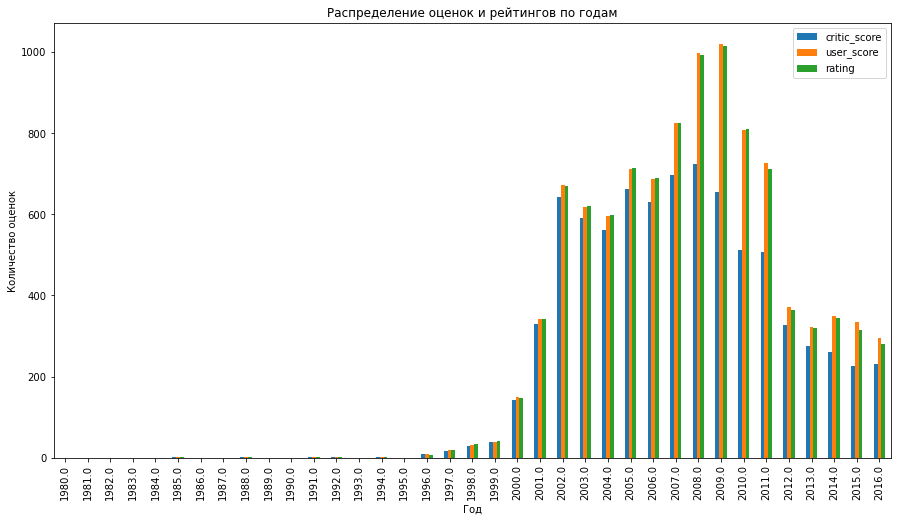

In [10]:
df.groupby('year_of_release')[['critic_score','user_score', 'rating']].agg('count').plot.bar(figsize=(15,8))
plt.xlabel('Год')
plt.ylabel('Количество оценок')
plt.title('Распределение оценок и рейтингов по годам')
plt.show();

Видим, что данные начинают появляться только во второй половине 1990-х. Вероятно, ранее системы оценок не существовало, или они не имели такого большого распространения. То же самое можно сказать и о столбце с рейтингом. Негосударственная организация ESRB была основана в 1994 году, поэтому более ранних данных мы не имеем. 
Очевидно, данные пропуски нельзя назвать случайными, поэтому заполнять из какими-либо значениями некорректно. Оставим эти пропуски незаполненными. 

Рассмотрим пропущенные значения в столбце `genre`:

In [11]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что в этих же строчках есть пропущенные значения 2 значения в столбце `name`. Поскольку это всего 2 строки, отсутствие данных в них сильно не повлияет на наше исследование. Оставим их незаполненными.

Заменим в столбце `rating` пропущенные значения на явное выбивающееся значение `no rating`:

In [12]:
df['rating'] = df['rating'].fillna('no rating')

### Замена типа данных

Посмотрим, какие данные содержатся в столбце `user_score`:

In [13]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что помимо числовых значений (в виде строк) и NaN в столбце есть срока `tbd`, что означает "to be determined" - "будет определено". Посмотрим, сколько этих значений в столбце:

In [14]:
df[df['user_score'] == 'tbd']['user_score'].count()

2424

По сути это отсутствующее значение, поэтому заменим эти значения на NaN и приведем все значения в столбце к типу `float`:

In [15]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype('float')

Приведем значения в столбцах `critic_score` и `year_of_release` к целочисленному типу `Int64`:

In [16]:
df['critic_score'] = df['critic_score'].astype('Int64')
df['year_of_release'] = df['year_of_release'].astype('Int64')

Посмотрим, как изменились данные в нашей таблице:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Мы избавились от пропусков там, где это возможно и заменили типы данных в нескольких столбцах.

### Обработка дубликатов

Проверим, не появились ли в нашей таблице дубликаты:

In [18]:
df.duplicated().sum()

0

Дубликаты не обнаружены.

### Расчёты и добавление результатов в таблицу

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`:

In [19]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Проверим, какие значения рейтинга ESRB есть в нашей таблице:

In [20]:
df['rating'].unique()

array(['E', 'no rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Имеем следующие значения:
E — Everyone, M — Mature, T — Teen, E10+ — Everyone 10+, K-A — Kids to Adults (первоначальное название рейтинга Everyone), AO — Adults Only, EC — Early Childhood, RP — Rating Pending.

Создадим столбец `rating_description`, в который добавим расшифровку обозначений рейтинга ESRB:

In [21]:
rating_dict = {'E':'Для всех (6+)', 
               'M':'Для взрослых (17+)', 
               'T':'Для подростков (13+)', 
               'E10+':'Для всех (10+)', 
               'K-A':'Для всех (6+)', 
               'AO':'Только для взрослых (18+)', 
               'EC':'Для малышей (3+)', 
               'RP':'Рейтинг ожидется',
               'no rating':'Без рейтинга'
              }
    
df['rating_description'] = df[df['rating'].notnull()]['rating'].map(rating_dict) 

**Вывод**

Мы провели следующие преобразования:

* Привели наименования столбцов к нижнему регистру.
* Заполнили пропуски в столбце `year_of_release`. В столбцах `name` и `genre` пропуски содержатся в одних и тех же строках, мы решили оставить их нетронутыми. Столбцы `critic_score`, `user_score` и `rating` содержат пропуски по объективным причинам - до определенного момента времени ни системы оценок игр, ни рейтинга не существовало. Эти пропуски мы так же оставили не заполненными.
* В столбце `rating` заменили пропущенные значения явным обозначением `no rating`.
* В столбце `user_score` мы заменили значение `tbd` на NaN.
* В столбцах `year_of_release` и `critic_score` мы заменили тип данных на `int`, а в столбце `user_score` - на `float`.
* Убедились, что в нашей таблице отсутствуют дубликаты.
* Добавили в таблицу столбец `total_sales` с данными о суммарных продажах игр во всех регионах (миллионы проданных копий).
* Добавили стоблец `rating_description`, в котором содержится расшифровка обозначений рейтинга ESRB.

<a id="step3"></a>
## 3. Исследовательский анализ данных

### Количество выпущенных игр

Посмотрим, сколько игр выпускалось в разные годы:

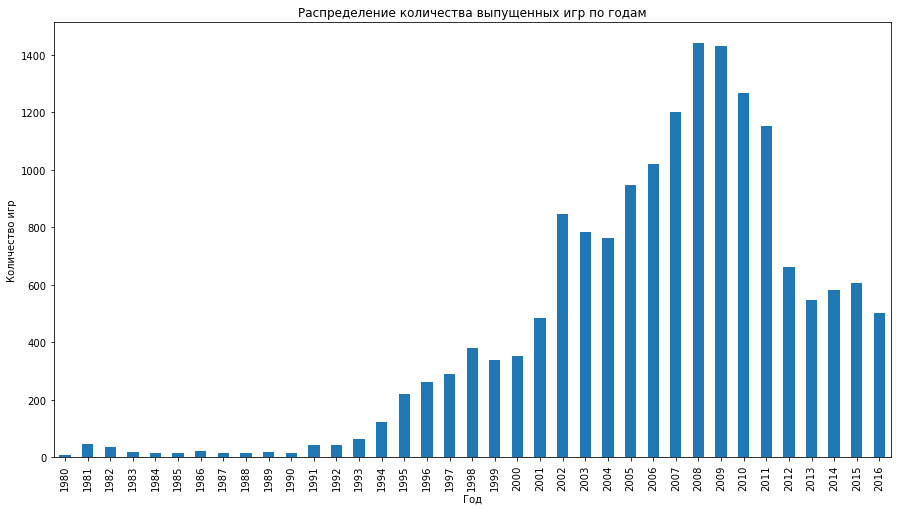

In [22]:
df.groupby('year_of_release')['platform'].agg('count').plot.bar(figsize=(15,8))
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Распределение количества выпущенных игр по годам')
plt.show();

Видим, что до 1994 года игр выпускалось не много, а после случился значительный рост, связанный с активным развитием игровой индустрии. Резкий скачок заметен в 2002 году, пиковые значения - в 2008 и 2009 годах. Далее видим спад с особенно явным отскоком с 2011 по 2012 год. Можно связать это снижение с развитием мобильных устройств и возросшим числом игровых мобильных приложений.

### Продажи по платформам

Рассмотрим, как изменялись с течением времени продажи на отдельных платформах. Для начала выделим 10 платформ с наибольшими продажами:

In [23]:
top_platforms = df.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).head(10)
top_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

Рассмотрим эти данные в виде столбчатой диаграммы:

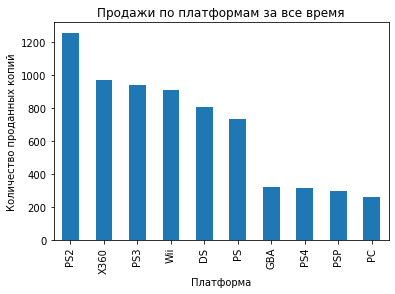

In [24]:
top_platforms.plot.bar()
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий')
plt.title('Продажи по платформам за все время')
plt.show();

Исходя их графика можем выделить платформы с наибольшими суммарными продажами - PS2, X360, PS3, Wii, DS, PS. Выделим их в отдельный список. Составим из общих данных сводную таблицу, содержащую в себе данные о платформе, годе выпуска и общим продажам, и отфильтруем в этой таблице только платформы из нашего Топ-6 списка:

In [25]:
top_platforms_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

sales_by_year = df.pivot_table(index = ['platform', 'year_of_release'], values ='total_sales', aggfunc='sum').reset_index()
sales_by_year = sales_by_year.query('platform in @top_platforms_list')

Рассмотрим, как на выделенных нами 6 платформах распределялись продажи в течение времени:

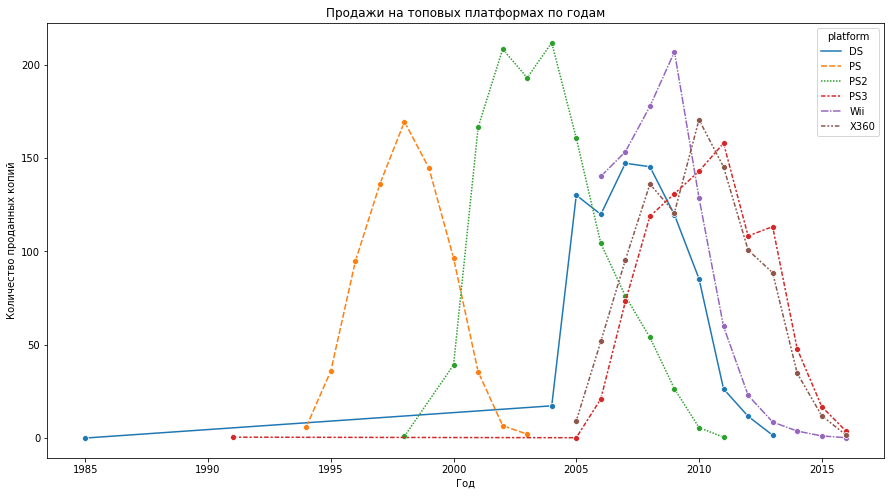

In [26]:
plt.figure(figsize=(15,8))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', marker='o', style='platform', data=sales_by_year)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий')
plt.title('Продажи на топовых платформах по годам')
plt.show();

На графике отчетливо прослеживается смена поколений платформы PlayStation. Данные по первой приставке PS явно выбиваются по времени от остальных топовых платформ.

Можно заметить, что "срок жизни" каждой платформы составляет около 10 лет:
* DS - 10 лет (2004-2013);
* PS - 10 лет (1994-2003);
* PS2 - 11 лет (2000-2010);
* PS3 - 11 лет (2006-2016);
* Wii - 10 лет (2006-2015);
* X360 - 12 лет (2005-2016).

Видим, что наибольшее скопление данных по платформам сконцентрировано со второй половины 2000-х по начало 2010-х годов. На графике выпущенных игр выше мы видели схожую картину расцвета рынка видеоигр.

### Определение актуального периода

Для дальнейшего анализа возьмем актуальные данные последних нескольких лет. Будем рассматривать данные начиная с 2014 года.

Посмотрим, какое количество данных мы имеем в этом периоде:

In [27]:
period = df[df['year_of_release'] >= 2014]
period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1689 non-null   object 
 1   platform            1689 non-null   object 
 2   year_of_release     1689 non-null   Int64  
 3   genre               1689 non-null   object 
 4   na_sales            1689 non-null   float64
 5   eu_sales            1689 non-null   float64
 6   jp_sales            1689 non-null   float64
 7   other_sales         1689 non-null   float64
 8   critic_score        718 non-null    Int64  
 9   user_score          888 non-null    float64
 10  rating              1689 non-null   object 
 11  total_sales         1689 non-null   float64
 12  rating_description  1689 non-null   object 
dtypes: Int64(2), float64(6), object(5)
memory usage: 188.0+ KB


Всего 1691 строка, и примерно половина из них имеет данные об оценках и рейтинге.

Рассмотрим, какие именно игровые платформы вошли в наш список:

In [28]:
period['platform'].value_counts()

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

### Продажи по платформам в актуальном периоде

Составим сводную таблицу с продажами на платформах в выбранный нами актуальный период:

In [29]:
sales_in_period = period.pivot_table(index = ['platform', 'year_of_release'],
                                     values ='total_sales',
                                     aggfunc='sum'
                                    ).reset_index()

Построим график динамики продаж на платформах в актуальный период:

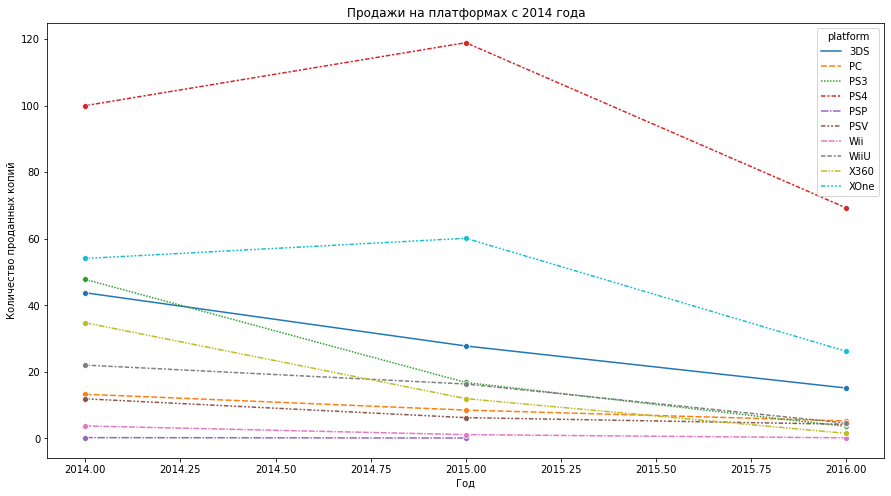

In [30]:
plt.figure(figsize=(15,8))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', marker='o', style='platform', data=sales_in_period)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий')
plt.title('Продажи на платформах с 2014 года')
plt.show();

По всем платформам наблюдаем динамику снижения объема продаж с течением времени.

На конец 2016 года лидируют по продажам следующие платформы: PS4, XОne, 3DS - следующие поколения выделенных нами ранее консолей PS2/PS3, X360 и DS, которые к этому моменту уже устарели и ушли в рынка. Также исходя из данных видно, что количество выпущенных игр, которые приходятся на эти платформы, имеет тенденцию к снижению. Отсюда можно сделать вывод, что в последней точке рынок игр находится на спаде. 

### Диаграммы размаха по платформам в актуальном периоде

Построим "ящик с усами" для всех платформ, существовавших в выбранный нами период:

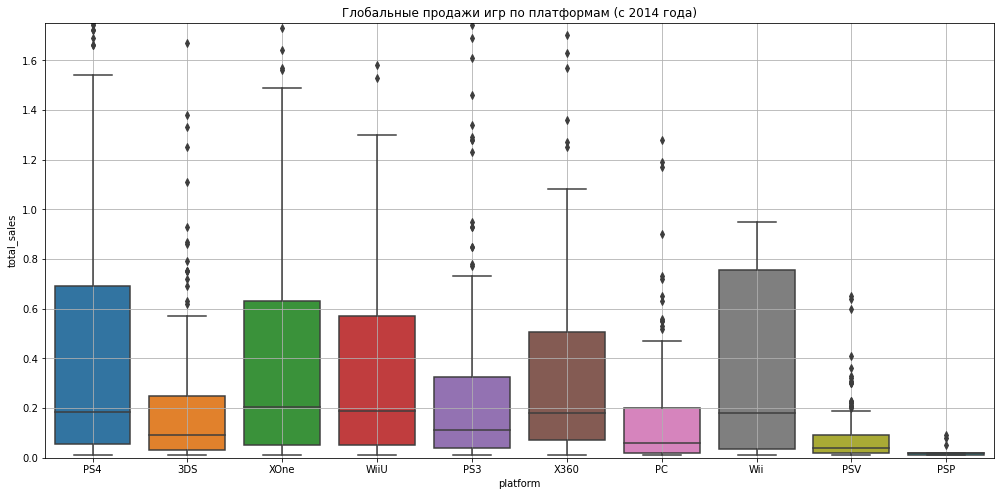

In [31]:
plt.figure(figsize=(17,8))
sns.boxplot(x='platform', y='total_sales', data=period)
plt.ylim(0,1.75)
plt.grid(True)
plt.title('Глобальные продажи игр по платформам (с 2014 года)')
plt.show()

Видим, что медиана у разных платформ сильно отличается. У топовых платформ Wii, X360, PS3, PS4, а также у платформ XOne и WiiU медиана расположена в промежутке от 110 до 210 тыс. копий, у остальных -  менее 100 тыс. копий. Также сильно отличается у разных платформ верхняя граница, например, у топовых платформ PS4 и XOne она близка к уровню 1.5 млн. копий, у WiiU - 1.3 млн. копийб у остальных же платформ от 1.1 млн. копий и менее.

Практически у всех платформ наблюдаются выбросы. В данном случае они означают отдельные игры-бестселлеры, имевшие успех на рынке.

Продажи игр на ПК, как отмечалось ранее, заметно уступают продажам для игровых приставок.

### Влияние отзывов пользователей и критиков

Рассмотрим на примере отдельной платформы, как влияют на продажи оценки критиков и пользователей. В качестве примера выберем платформу PS4 - выделенного нами лидера по продажам за последний год. Посмотроим диаграмму рассеяния для продаж, оценок критиков и оценок пользователей:  

Диаграмма рассеяния для продаж, оценок критиков и пользователей


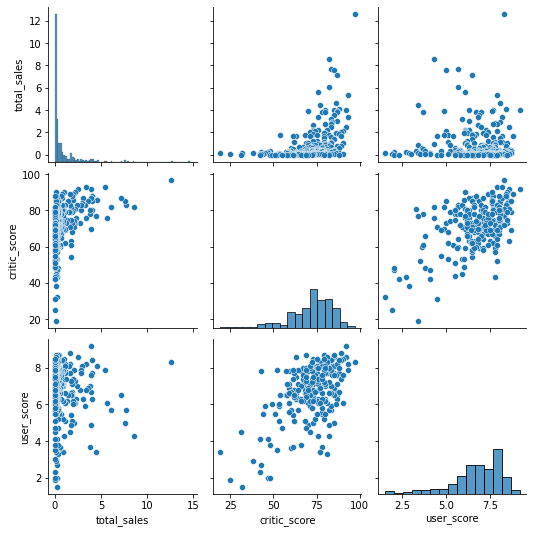

In [32]:
ps4_scores = df[df['platform'] == 'PS4'][['total_sales', 'critic_score', 'user_score']]

print('Диаграмма рассеяния для продаж, оценок критиков и пользователей')
sns.pairplot(ps4_scores)
plt.show()

Глядя на график, можем сказать, что при повышении оценок критиков наблюдается рост продаж, т.е. чем игра более продаваема и популярна, тем выше будет оценка критиков. В случае с пользовательскими оценками все не так однозначно, картина более размытая. Пользователи не всегда высоко оценивают игры, которые хорошо продаются на рынке. 

Построим матрицу корреляций для тех же параметров:

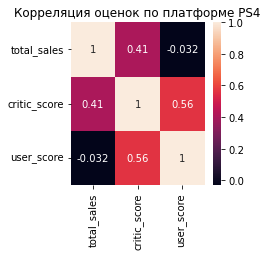

In [33]:
plt.figure(figsize=(3, 3))
sns.heatmap(ps4_scores.corr(), annot=True)
plt.title('Корреляция оценок по платформе PS4');

Видим ту же картину: прослеживается корреляция между оценкам критиков и продажами. Подобной явной взаимосвязи с оценками пользователей не прослеживается. 

Проверим правильность наших выводов на примере 6 топовых платформ, которые мы отобрали ранее. Рассмотрим аналогичные показатели корреляции:

Корреляция оценок по топовым платформам:


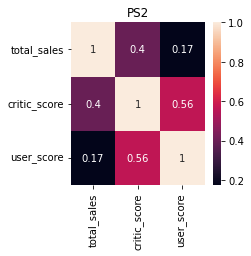

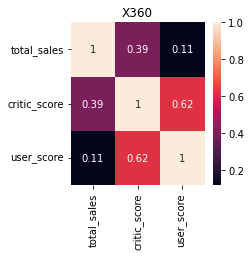

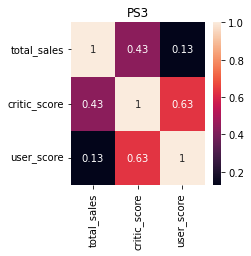

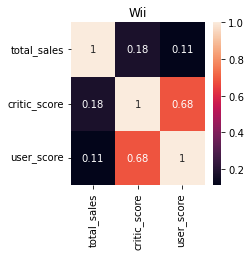

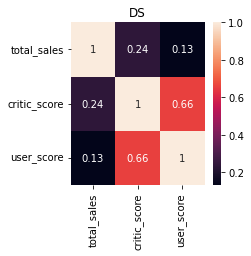

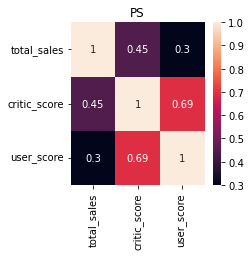

In [34]:
print('Корреляция оценок по топовым платформам:')

for platform in top_platforms_list:
    filtered = df[df['platform'] == platform][['total_sales', 'critic_score', 'user_score']]
    
    plt.figure(figsize=(3, 3))
    sns.heatmap(filtered.corr(), annot=True)
    plt.title(platform);

На примере платформ PS2, X360, PS3, PS, XOne видим выявленную нами ранее тенденцию: чем выше оценка критиков, тем выше продажи игр, а связь с оценками пользователей не очевидна. По платформам Wii и DS зависимость так явно не прослеживается.

### Распределение игр по жанрам

Рассмотрим, как в выбранном периоде игры распределены по жанрам. Составим сводную таблицу, в которой сгруппируем данные о продажах и количестве выпущенных игр по жанрам:

In [35]:
genres = period.pivot_table(index = 'genre', 
                            values =['total_sales', 'platform'], 
                            aggfunc={'total_sales':'mean', 'platform':'count'}
                           ).reset_index().sort_values(by='total_sales', ascending=False)

genres

,genre,platform,total_sales
8,Shooter,128,1.335469
10,Sports,161,0.680000
4,Platform,38,0.476053
2,Fighting,60,0.470333
7,Role-Playing,221,0.459005
6,Racing,69,0.398841
3,Misc,113,0.332301
0,Action,619,0.322068
9,Simulation,44,0.298409
5,Puzzle,14,0.157857


Построим столбчатую диаграмму по этим данным:

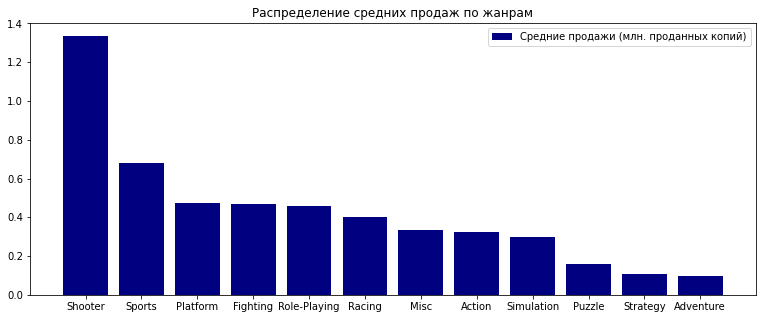

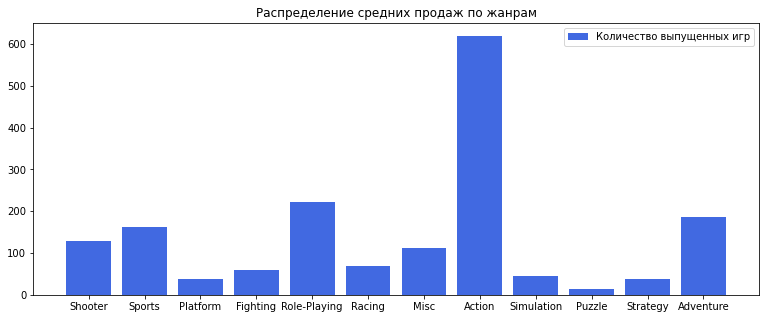

In [36]:
plt.figure(figsize=(13,5))
#plt.bar(x='genre', height='platform', data=genres, color='royalblue', label='Количество выпущенных игр')
plt.bar(x='genre', height='total_sales', data=genres, color='navy', label='Средние продажи (млн. проданных копий)')
plt.legend()
plt.title('Распределение средних продаж по жанрам');

plt.figure(figsize=(13,5))
plt.bar(x='genre', height='platform', data=genres, color='royalblue', label='Количество выпущенных игр')
plt.legend()
plt.title('Распределение средних продаж по жанрам');

Наиболее прибыльными по средним продажам являются игры жанра Shooter, далее с сильным отставанием идут игры жанра Sports. Несмотря на то, что в рассматирваемом периоде игр в жанре Action выпускалось гораздо больше, чем игр во всех остальных жанрах, их средние продажи в 3 раза меньше, чем у жанра Shooter.

**Вывод**

Мы провели исследовательский анализ данных и сделали следующие выводы:

* Рынок видеоигр начал расти с 1994 года, был на пике в 2008-2009 годах и далее пошел на спад, который можно связать с развитием и ростом популярности мобильных игр.
* Топовые игровые платформы за весь исследуемый период: 
    * 3 поколения PlayStation - PS, PS2, PS3 производства компании Sony;
    * Xbox 360 производства компании Microsoft;
    * карманная игровая консоль DS и игровая приставка Wii производства компании Nintendo.
* Средний срок жизни игровых платформ составляет порядка 10 лет.
* Больше всего продаж наблюдается у платформ PS3, PS4 и X360.
* Количество проданных игр напрямую коррелирует с оценками критиков, а вот оценки пользователей на продажи так явно не влияют.
* Наиболее прибыльными по средним продажам являются игры жанра Shooter, далее с сильным отставанием идут игры жанра Sports.


<a id="step4"></a>
## 4. Портрет пользователя по регионам

В нашем распоряжении имеются данные о продажах игр в 3 основных регионах - Северная Америка, Европа и Япония. Попробуем составить портрет пользователя в каждом из этих регионов: рассмотрим, какие самые популярные платформы и жанры, а также посмотрим, как влияет рейтинг игр на продажи в регионе.

### Топ-5 популярных платформ

Рассмотрим, какие платформы лидируют по продажам в каждом регионе:

Топ-5 популярных платформ в регионe:


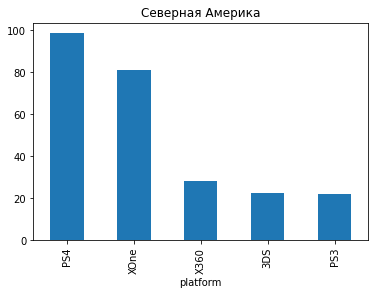

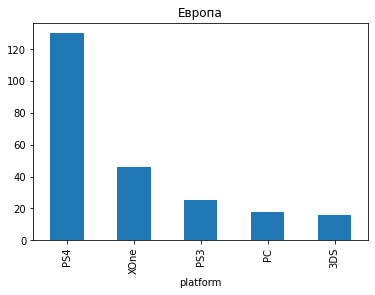

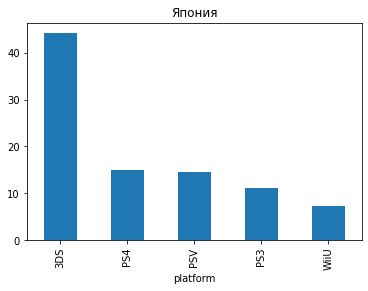

In [37]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
title_dict = {'na_sales':'Северная Америка', 'eu_sales':'Европа', 'jp_sales':'Япония'}

print('Топ-5 популярных платформ в регионe:')

for col in columns:
    platform = period.groupby('platform')[col].agg('sum').sort_values(ascending=False).head()
    platform.plot.bar()
    plt.title(title_dict[col])
    plt.show()

В Северной Америке лидируют 2 платформы - PS4 и XOne, далее на примерно схожем уровне находятся плафтормы X360, 3DS и PS3.

В Европе видим одного выбивающегося лидера - PS4, на втором месте со значительным отставанием - XOne. Далее идут платформы PS3, PC и 3DS.

В Японии ситуация несколько иная. Похоже, что в этом регионе пользователи больше ориентированы на карманные игровые консоли, поэтому в лидерах мы имеем платформу 3DS. Далее идут примерно равные по продажам платформы PS4, PSV, PS3 и WiiU. Отметим также, что лидируют на японском рынке платформы исключительно японских производителей.  

### Топ-5 популярных жанров

Рассмотрим, какие игровые жанры лидируют по продажам в каждом регионе:

Топ-5 популярных жанров в регионe:


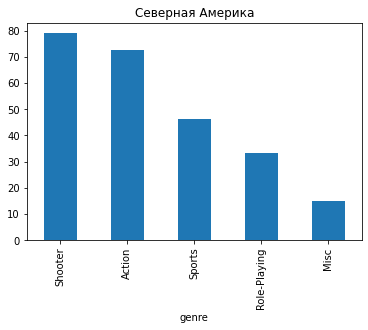

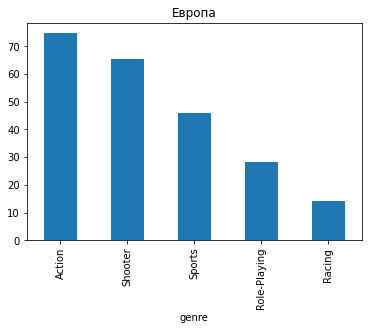

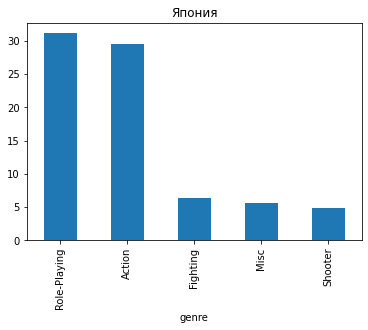

In [38]:
print('Топ-5 популярных жанров в регионe:')

for col in columns:
    platform = period.groupby('genre')[col].agg('sum').sort_values(ascending=False).head()
    platform.plot.bar()
    plt.title(title_dict[col])
    plt.show()

Видим схожую тенденцию, что и ранее, в случае с жанрами: в Северной Америке и Европе совпадают места с первого по четвертое. Их занимают жанры Action, Sports, Shooter и Role-Playing. На 5 месте в Северной Америке жанр Misc (игры смешанного жанра), в Европе - Racing.

В Японии опять же картина совершенно иная: со значительным отрывом лидируют жанры Role-Playing и Action, далее идут жанры Fighting, Misc и Shooter.

### Влияние рейтинга ESRB

Рассмотрим, как в каждом регионе распределены продажи в соответствии с рейтингом ESRB:

Продажи в регионe в соответствии с рейтингом ESRB:


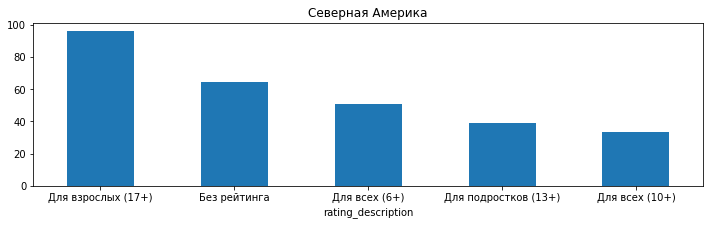

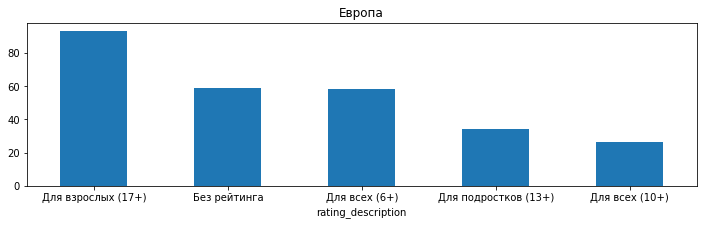

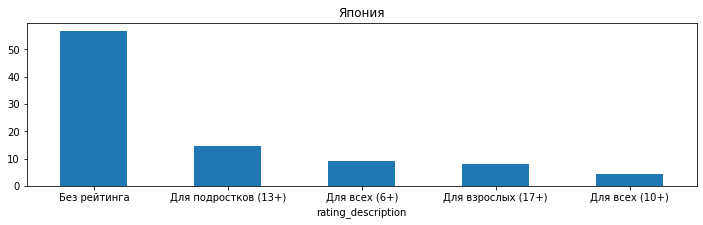

In [39]:
print('Продажи в регионe в соответствии с рейтингом ESRB:')

for col in columns:
    platform = period.groupby('rating_description')[col].agg('sum').sort_values(ascending=False).head()
    
    plt.figure(figsize=(12, 3))
    platform.plot.bar()
    plt.title(title_dict[col])
    plt.xticks(rotation=0) 
    plt.show()

Видим практически одинаковое распределение рейтинга в Северной Америке и Европе. Большая часть выручки получена с игр с рейтингом M - "Для взрослых (17+)", далее идут игры с неопределенным рейтингом, игры с рейтингом E - "Для всех (6+)", игры с рейтингом T - "Для подростков (13+)" и игры с рейтингом E10+ - "Для всех (10+)".

В Японии картина значительно отличается. В этом регионе лидируют игры с неопределенным рейтингом. Если мы обратимся к описанию рейтинговой системы ESRB, то узнаем, что он предназначен для маркировки игр для США и Канады. Следовательно, пользователи в Японии скорее всего не ориентируются на него при выборе игр. В остальном игры распределены в следующем порядке: T - "Для подростков (13+)", E - "Для всех (6+)", M - "Для взрослых (17+)" и E10+ - "Для всех (10+)".

**Вывод**

Мы рассмотрели в выбранном нами периоде данные по распределению продаж в соответствии с платформами, жанрами и рейтингом ESRB по 3 различным регионом и выяснили следующее:

* По предпочитаемым платформам Северная Америка и Европа схожи:  на первых 2 местах по продажам платформы PS4 и XOne. Далее в Северной Америке схожем уровне находятся плафтормы X360, 3DS и PS3, а в Европе - платформы PS3, PC и 3DS.В Японии пользователи больше ориентированы на карманные игровые консоли, поэтому в лидерах мы имеем платформу 3DS. Далее идут примерно равные по продажам платформы PS4, PSV, PS3 и WiiU. Стоит отметить, что лидируют на японском рынке платформы исключительно японских производителей.

* По жанрам картина схожая: в Северной Америке и Европе совпадают места с первого по четвертое. Их занимают жанры Action, Sports, Shooter и Role-Playing. В Японии  со значительным отрывом лидируют жанры Role-Playing и Action.

* Распределение рейтинга в Северной Америке и Европе очень похоже: большая часть выручки получена с игр с рейтингом M - "Для взрослых (17+)", далее идут с неопределенным рейтингом, игры с рейтингом E - "Для всех (6+)", игры с рейтингом T - "Для подростков (13+)" и игры с рейтингом E10+ - "Для всех (10+)". В Японии лидируют игры с неопределенным рейтингом, что обясняется распространением рейтинговой системы ESRB для маркировки игр для США и Канады, т.е. пользователи из Японии не ориентируются на него при выборе игр. Далее, с довольно сильным отставанием, идут игры с рейтингом T - "Для подростков (13+)", E - "Для всех (6+)", M - "Для взрослых (17+)" и E10+ - "Для всех (10+)".

Также мы отметили, что Северная Америка является самым большим по объему рынком продаж видеоигр. Рынок Европы составляет примерно половину от всех продаж на рынке Северной Америки. Японский рынок видеоигр является самым меньшим по объему из представленных трех.

<a id="step5"></a>
## 5. Проверка гипотез

Заранее напишем функцию для проверки наших гипотез (будем использовать метод `ttest_ind`, т.к. средние значения выборок не зависят друг от друга, а степень свободы ddof зададим равную единице, поскольку работаем с выборками из генеральной совокупности):

In [40]:
def test(df1, df2):
    
    results = st.ttest_ind(
    df1, 
    df2, 
    equal_var=False)

    print('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")


Также напишем функцию для построения гистограм:

In [ ]:
def histogram(task1, task2, x_col, label1, label2, hist_title):
    sns.set(rc={'figure.figsize':(8,4)})
    
    sns.histplot(data=df.query(task1),
                     x=x_col,
                     color='blue', 
                     label=label1, 
                     kde=True, 
                     bins=20)
    sns.histplot(data=df.query(task2),
                     x=x_col,
                     color='red', 
                     label=label2,
                     kde=True,
                     bins=20)
    plt.legend()
    plt.title(hist_title)
    plt.show()
    

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки гипотезы примем следующее: 

H0 (нулевая гипотеза)  -  cредние пользовательские оценки платформ Xbox One и PC равны.

H1 (альтернативная гипотеза)  - cредние пользовательские оценки платформ Xbox One и PC отличаются.

Уровень значимости α примем равным 0.5%.

In [ ]:
alpha=.05

Создадим 2 таблицы, в которых сохраним данные по платформам XOne и PC:

In [ ]:
xone = period[period['platform'] == 'XOne']['user_score'].dropna()
pc = period[period['platform'] == 'PC']['user_score'].dropna()

Построим график пользовательских оценок по платформам XOne и PC, чтобы оценить распределение наших выборок:

In [ ]:
histogram('platform == "XOne"', 
          'platform == "PC"', 
          'user_score', 'XOne', 
          'PC', 
          'Распределение пользовательских оценок по плаформам XOne и PC')

Проверим нулевую гипотезу, используя написанную раннее функцию:

In [ ]:
test(xone, pc)

Таким образом, в актуальном периоде остается верным утверждение, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports разные

Для проверки гипотезы примем следующее: 

H0 (нулевая гипотеза)  -  средние пользовательские рейтинги жанров Action и Sports равны.

H1 (альтернативная гипотеза)  - cредние пользовательские оценки платформ Xbox One и PC отличаются.

Уровень значимости α примем равным 0.5%.

In [ ]:
alpha=.05

Создадим 2 таблицы, в которых сохраним данные по жанрам Action и Sports:

In [ ]:
action = period[period['genre'] == 'Action']['user_score'].dropna()
sports = period[period['genre'] == 'Sports']['user_score'].dropna()

In [ ]:
histogram('genre == "Action"', 
          'genre == "Sports"', 
          'user_score', 
          'Action', 
          'Sports', 
          'Распределение пользовательских оценок по жанрам Action и Sports')

Проверим нулевую гипотезу, используя написанную раннее функцию:

In [ ]:
test(action, sports)

Отвергаем нулевую гипотезу. Значит в выбранном периоде средние пользовательские рейтинги жанра Action отличаются от средних пользовательские рейтинги жанра Sports.

**Вывод**

Перед нами стояла задача проверки 2 гипотез:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action и Sports разные.

В первом случае мы приняли за нулевую гипотезу утверждение о том, что cредние пользовательские оценки платформ Xbox One и PC равны. Альтернативная гипотеза - cредние пользовательские оценки платформ Xbox One и PC не равны. Нам не удалось отвергнуть нулевую гипотезу и мы сделали вывод о том, что пользовательские рейтинги платформ Xbox One и PC равны.

Во втором случае мы приняли за нулевую гипотезу утверждение о том, что средние пользовательские рейтинги жанров Action и Sports равны. Альтернативная гипотеза - cредние пользовательские оценки платформ Xbox One и PC не равны. Нам удалось отвергнуть нулевую гипотезу и таким образом мы сделали вывод о том, что средние пользовательские рейтинги жанров Action и Sports отличаются.

<a id="step6"></a>
## 6. Общий вывод

Мы провели исследование рынка видеоигр во временном периоде с 1980 по 2016 год. В нашем распоряжении были данные о выпущенных играх, платформах, годах выпуска и жанрах, информация о продажах в мире, а также оценках и рейтинге этих игр. Перед нами была поставлена задача выявления закономерностей, определяющих успешность той или иной игры.

Для проведения анализа мы предварительно рассчитали общий объем продаж игр по разным регионам.

В нашем исследовании было несколько этапов:

1. В ходе исследовательского анализа данных мы выснили, что в развитии рынка видеоигр можно выделить несколько этапов: до 1994 года особого развития не наблюдалось, рынок начал расти с 1994 года и был на пике в 2008-2009 годах и далее пошел на спад, который, скорее всего, связан с развитием мобильных игр. За весь наиболее популярными оказались платформы PS2, X360, PS3, Wii, DS, PS, а средний срок жизни платформы составляет порядка 10 лет.


2. Мы обнаружили, что оценки критиков оказывают значительное влияние на продажи игр, в отличие от оценок пользователей, которые не влияют так явно на продажи, что говорит нам о том, что для потенциальных покупателей мнение критиков важнее мнения других пользователей. Наиболее прибыльными по средним продажам являются игры жанра Shooter, далее с сильным отставанием идут игры жанра Sports.


3. Мы составили портреты пользователей для 3 регионов:

* По предпочитаемым платформам Северная Америка и Европа схожи:  на первых 2 местах по продажам платформы PS4 и XOne. Далее в Северной Америке схожем уровне находятся плафтормы X360, 3DS и PS3, а в Европе - платформы PS3, PC и 3DS.В Японии пользователи больше ориентированы на карманные игровые консоли, поэтому в лидерах мы имеем платформу 3DS. Далее идут примерно равные по продажам платформы PS4, PSV, PS3 и WiiU. Стоит отметить, что лидируют на японском рынке платформы исключительно японских производителей.

* По жанрам картина схожая: в Северной Америке и Европе совпадают места с первого по четвертое. Их занимают жанры Action, Sports, Shooter и Role-Playing. В Японии со значительным отрывом лидируют жанры Role-Playing и Action.

* Распределение рейтинга в Северной Америке и Европе очень похоже: большая часть выручки получена с игр с рейтингом M - "Для взрослых (17+)", далее идут с неопределенным рейтингом, игры с рейтингом E - "Для всех (6+)", игры с рейтингом T - "Для подростков (13+)" и игры с рейтингом E10+ - "Для всех (10+)". В Японии лидируют игры с неопределенным рейтингом, что обясняется распространением рейтинговой системы ESRB для маркировки игр для США и Канады, т.е. пользователи из Японии не ориентируются на него при выборе игр. Далее, с довольно сильным отставанием, идут игры с рейтингом T - "Для подростков (13+)", E - "Для всех (6+)", M - "Для взрослых (17+)" и E10+ - "Для всех (10+)".

4. Также мы провели статистический анализ, в котором исследовали 2 гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Мы приняли за нулевую гипотезу утверждение о том, что cредние пользовательские оценки платформ Xbox One и PC равны. Альтернативная гипотеза - cредние пользовательские оценки платформ Xbox One и PC не равны. Нулевую гипотезу отвергнуть не удалось.

* Средние пользовательские рейтинги жанров Action и Sports разные.
Мы приняли за нулевую гипотезу утверждение о том, что средние пользовательские рейтинги жанров Action и Sports равны. Альтернативная гипотеза - cредние пользовательские оценки платформ Xbox One и PC не равны. Мы отвергли нулевую гипотезу и приняли альтернативую гипотезу..
